In [1]:
import torch 
import sys

sys.path.append("/home/jovyan/beomi/ayushraina/ddpm_pipeline")
from models.unet import SimpleUNetModel

In [2]:
model = SimpleUNetModel(inChannels=3, outChannels=3, baseChannels=64, timeEmbeddingDimension=128, depth=5)

[2048, 1024, 512, 256, 128, 64]
Simple U net initialized with: 
Input Channels: 3
Output Channels: 3
Base Channels: 64
Time Embedding Dimension: 128
Depth: 5
Channel Dimensions: [64, 128, 256, 512, 1024, 2048]


In [3]:
# Testing with random data
batchSize = 16
imageSize = 64

x = torch.randn(batchSize, 3, imageSize, imageSize)
timesteps = torch.randint(0,1000,(16,))

# Testing Forward Pass
output = model.forward(x, timesteps)

print(f"Input Shape: {x.shape}")
print(f"Output Shape : {output.shape}")


Input Shape: torch.Size([16, 3, 64, 64])
Output Shape : torch.Size([16, 3, 64, 64])


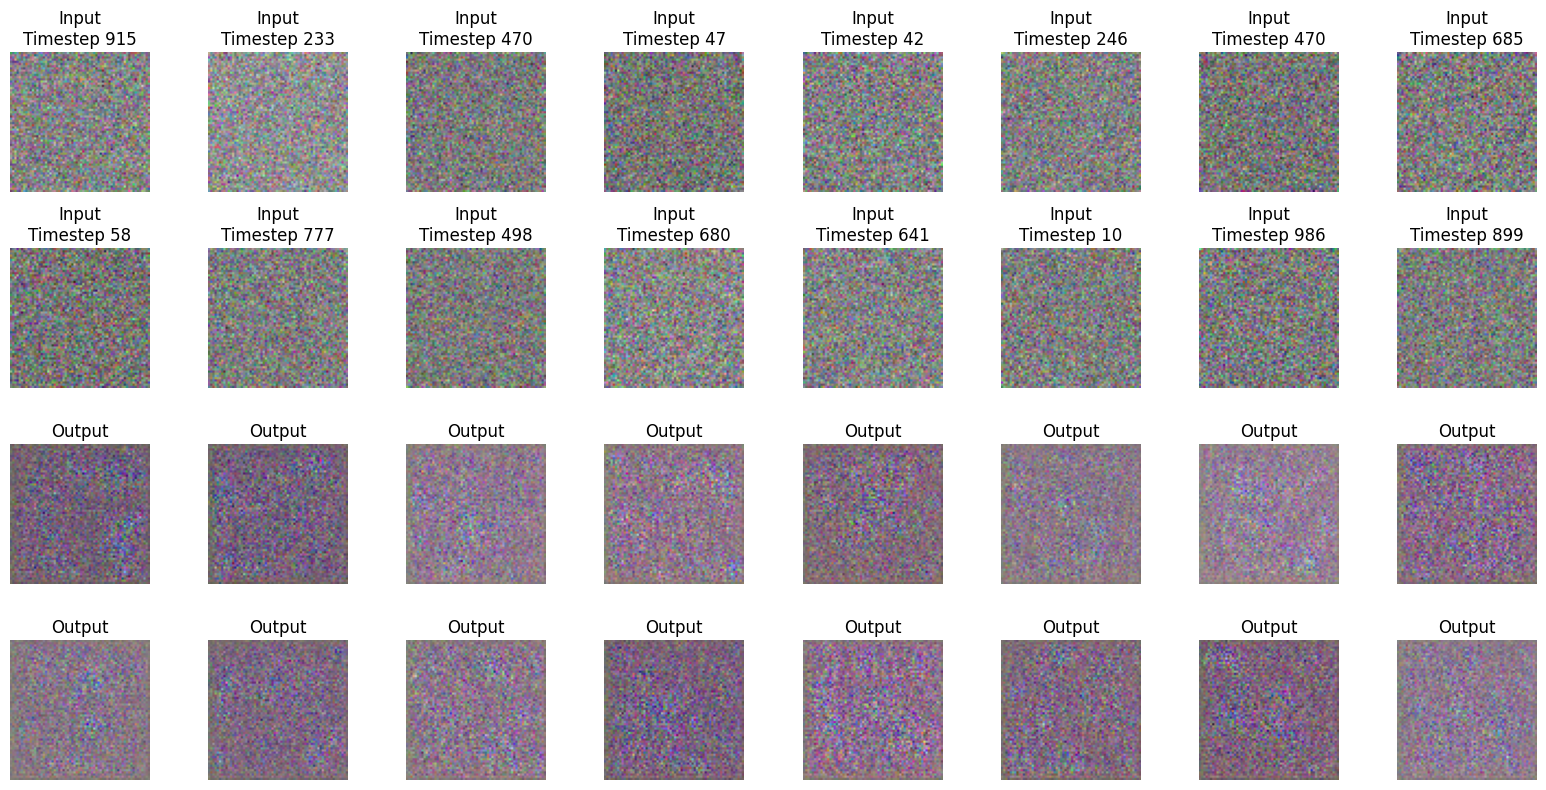

In [4]:
# Visualizing the input and Output
import matplotlib.pyplot as plt

def tensor_to_image(tensor):
    # Clamp and normalize to [0,1] for visualization
    img = tensor.detach().cpu()
    img = (img - img.min()) / (img.max() - img.min())
    img = img.permute(1, 2, 0).numpy()
    return img

fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i in range(16):
    row = i // 8
    col = i % 8
    # Input images
    axes[row, col].imshow(tensor_to_image(x[i]))
    axes[row, col].set_title(f"Input\nTimestep {timesteps[i].item()}")
    axes[row, col].axis('off')
    # Output images
    axes[row + 2, col].imshow(tensor_to_image(output[i]))
    axes[row + 2, col].set_title("Output")
    axes[row + 2, col].axis('off')
plt.tight_layout()
plt.show()